In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(x_train)

60000

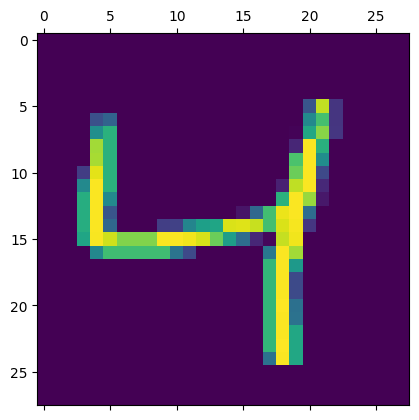

In [ ]:
plt.matshow(x_train[2])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)

In [ ]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
# dimension of x_train_flattened
x_train_flattened.ndim

2

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8100 - loss: 0.7284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9209 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9233 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9250 - loss: 0.2658


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9134 - loss: 0.3016


[0.26700860261917114, 0.9247999787330627]

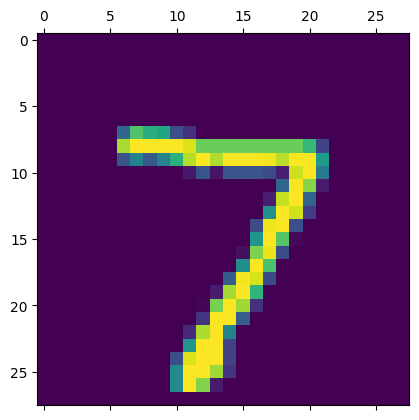

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.4750598e-02, 2.7544269e-07, 7.4215285e-02, 9.5563447e-01,
       2.4606569e-03, 1.1038025e-01, 2.1077951e-06, 9.9974388e-01,
       8.4492743e-02, 6.4719760e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
# find max in each argument
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  926,   17,    7,    2,   13,    9,   40,    4],
       [   4,    0,   21,  926,    0,   19,    2,   10,   21,    7],
       [   2,    1,    6,    2,  916,    0,   10,    4,   11,   30],
       [  12,    3,    3,   36,    9,  770,   17,    5,   31,    6],
       [  13,    3,    7,    1,    7,   12,  911,    2,    2,    0],
       [   1,    5,   23,   10,    7,    0,    0,  942,    4,   36],
       [   8,    7,    6,   20,    9,   25,   10,   11,  872,    6],
       [  11,    7,    1,   10,   32,    7,    0,   23,    6,  912]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

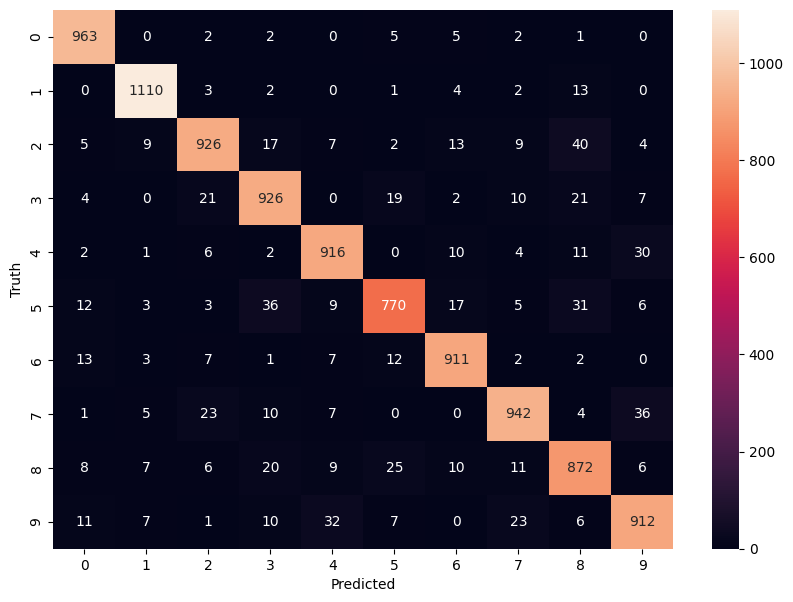

In [ ]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Now implementing hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.4594
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9615 - loss: 0.1357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9752 - loss: 0.0853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9813 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9836 - loss: 0.0529


In [ ]:
y_predicted = model.predict(x_test_flattened)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    1,    2,    0,    1,    1,    3],
       [   0, 1124,    3,    2,    0,    0,    2,    0,    4,    0],
       [   3,    2, 1006,    4,    2,    0,    2,    8,    5,    0],
       [   0,    0,    2,  990,    0,    5,    0,    4,    3,    6],
       [   1,    0,    5,    0,  961,    1,    3,    2,    0,    9],
       [   2,    0,    0,    6,    1,  872,    4,    0,    4,    3],
       [   5,    3,    3,    1,    5,    8,  931,    1,    1,    0],
       [   0,    6,    8,    2,    0,    0,    0, 1001,    2,    9],
       [   6,    2,    4,    3,    4,    4,    2,    7,  936,    6],
       [   2,    5,    0,    4,   11,    2,    0,    5,    1,  979]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

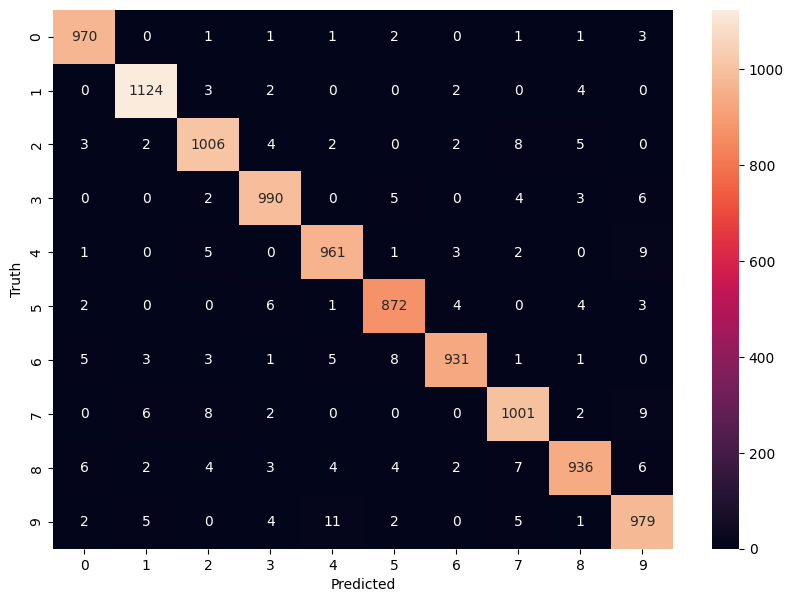

In [ ]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    # direct flattening of data
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8680 - loss: 0.4550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9607 - loss: 0.1315
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9718 - loss: 0.0926
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9894 - loss: 0.0345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0212
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9943 - loss: 0.0185


In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    2,    1,    0,    2,    0,    1,    2],
       [   0, 1124,    2,    2,    0,    1,    2,    1,    3,    0],
       [   1,    1, 1000,    8,    1,    0,    2,    5,   12,    2],
       [   1,    1,    1,  993,    0,    3,    0,    7,    3,    1],
       [   0,    0,    0,    2,  967,    0,    4,    2,    0,    7],
       [   3,    0,    0,    5,    1,  873,    2,    1,    5,    2],
       [   3,    3,    2,    1,    2,    2,  941,    1,    3,    0],
       [   0,    3,    4,    4,    0,    0,    0, 1005,    3,    9],
       [   5,    1,    2,    5,    1,    3,    1,    3,  950,    3],
       [   0,    3,    0,    3,    6,    3,    0,    7,    3,  984]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

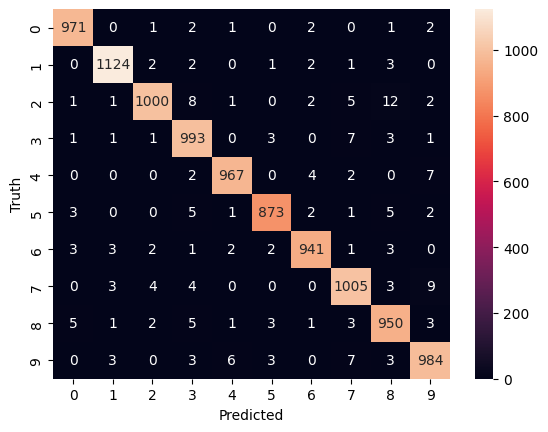

In [ ]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')